# Goals

The goal of this project is to analyze 2016 video game data so that I may identify the patterns that make games successful, so that I may spot potential big winners and plan advertising campaigns. I will begin by looking over the data for any changes that will help the analysis, like missing or duplicate values, values with unoptimal data types, and unoptimal column names. I will then look for anyways that I can enrich the data so my observations are richer and more accurate. Lastly I will create certian graphs to visualize important parts of the data, so meaningful conclusions may be visualized.

# Project

## Initialization

In [30]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns
import numpy as np

## Reading Data

In [31]:
df = pd.read_csv('./datasets/games.csv')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- All column names are currently starting with a uppercase character that will be changed to lowercase. 

- Data types for 'year_of_release', 'critic_score', and 'user_score' are unoptimal 
and will be changed to 'int64', with the data from 'user_score' being modified to fit the 'critic_score' format. This will allow me to better compare and combine them later on.

- 'year_of_release' is currently the 'float64' data type, but years are always whole numbers. As such this data will be changed to 'int64'.

- 'critic_score' is currently the 'float64' data type, but the scoring system is based on whole numbers from 0-100. As such this data will be changed to 'int64'.

- 'user_score' is currently the 'object' data type due to the presence of the 'tbd' value, however, the scoring system is based on real numbers from 0-10. This data will be modified and converted to 'int64' and multiplied by 10 to better compare to and combine with 'critic_score'.

- 'platform' is currently the 'object' data type and while this is acceptable, the 'category' data type may be more appropriate.

In [33]:
df.sample(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
5329,EverGrace,PS2,2000.0,Role-Playing,0.10,0.08,0.15,0.03,59.0,7.8,T
11429,Gintama Gin-Oh Quest: Gin-San ga Tenshoku Shit...,DS,2007.0,Role-Playing,0.00,0.00,0.08,0.00,NaN,NaN,NaN
1152,Dollar Dash,PS2,2005.0,Action,1.30,0.23,0.00,0.07,NaN,NaN,NaN
11452,Supremacy MMA,X360,2011.0,Fighting,0.05,0.02,0.00,0.01,49.0,6.2,M
1424,Gradius,NES,1986.0,Shooter,0.27,0.08,1.00,0.01,NaN,NaN,NaN
3100,Tiger Woods PGA Tour 09,PS3,2008.0,Sports,0.34,0.22,0.00,0.10,82.0,7.2,E
15196,Big Idea's VeggieTales: LarryBoy and the Bad A...,PS2,2006.0,Action,0.01,0.01,0.00,0.00,NaN,NaN,NaN
13099,Metal Slug Anthology,PSP,2007.0,Shooter,0.02,0.00,0.02,0.01,78.0,7.4,T
14199,Kekkaishi: Kokubourou no Kage,Wii,2007.0,Action,0.00,0.00,0.03,0.00,NaN,NaN,NaN
7207,Viewtiful Joe 2,GC,2004.0,Action,0.17,0.04,0.00,0.01,86.0,8.3,T


__Missing Values__

In [34]:
print('Missing Values:')
df.isna().sum()

Missing Values:


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [35]:
df[df['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


The 2 missing names might be impossible to determine and rows will be dropped, as the rest of the data is too limited to gain
any insight about trends. These 2 rows also include all the missing values for the 'genre' column, so these missing values will be addressed in the same way.

These values might be missing due to error in data entry. Both of these values are essential to the identity of the game, and as such are mandatory values that should not be missing.

In [36]:
df[df['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [37]:
df[df['Name'] == 'Space Invaders']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
4264,Space Invaders,SNES,1994.0,Shooter,0.00,0.00,0.46,0.00,NaN,NaN,NaN
8580,Space Invaders,N64,1999.0,Shooter,0.13,0.03,0.00,0.00,NaN,NaN,NaN
10383,Space Invaders,GBA,2002.0,Shooter,0.08,0.03,0.00,0.00,NaN,NaN,NaN


In [38]:
df[df['Name'] == 'PDC World Championship Darts 2008']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
6917,PDC World Championship Darts 2008,Wii,2008.0,Sports,0.02,0.21,0.0,0.01,51.0,5.4,E10+
15953,PDC World Championship Darts 2008,DS,NaN,Sports,0.01,0.00,0.0,0.00,NaN,NaN,NaN
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.0,0.00,43.0,tbd,E10+


In [39]:
df[df['Name'] == 'Hakuouki: Shinsengumi Kitan']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.0,0.0,0.0,NaN,NaN,NaN


The missing values for 'year_of_release' are numerous but could be filled in using data from rows with the same game name in certain cases or using the mean 'year_of_release' for the platform the game is on.

These values might be missing due to incomplete data collection or data entry errors. While year of release is not essential to the identity of a game, this data remains important information.

In [40]:
df[df['Critic_Score'].isna()].head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


Rows with missing values for 'critic_score' are also tend to miss values for 'user_score'. This data is vital to revealing the popularity of a game and hence some of it's success, however calculating this value from the other available data is not possible, due to the lack of correlation. In the case where other rows with the same name have missing values available, I will use that to fill in the data but it must be noted this may not be accurate, as the differences in platform are often factors that influenece scores.  Because the 'tbd' value is essentially a 'NaN' value, I will convert all 'tbd' values into 'Nan' to better process data.

Because rows with missing values for 'user_score' and 'critic_score' tend to miss both together, it might be possible this data is missing because such reviews have not been made. At first glance, the kinds of games that tend to have this missing data are older games, or obscure games. However for games that are not missing both values, reviews of a specific kind may have not been made leading to that specific missing data.

In [41]:
df[df['Rating'].isna()].sample(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
11446,Slayers Royal,PS,1998.0,Role-Playing,0.00,0.00,0.08,0.01,NaN,NaN,NaN
16407,Happy Dance Collection,Wii,2008.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
4264,Space Invaders,SNES,1994.0,Shooter,0.00,0.00,0.46,0.00,NaN,NaN,NaN
14199,Kekkaishi: Kokubourou no Kage,Wii,2007.0,Action,0.00,0.00,0.03,0.00,NaN,NaN,NaN
14698,DeathSmiles II,X360,2010.0,Shooter,0.00,0.00,0.03,0.00,NaN,NaN,NaN
1920,Virtua Fighter,SAT,1994.0,Fighting,0.17,0.12,0.77,0.02,NaN,NaN,NaN
4644,X-Men vs. Street Fighter,PS,1997.0,Fighting,0.16,0.11,0.12,0.03,NaN,NaN,NaN
2752,Yu-Gi-Oh! Dungeon Dice Monsters,GBA,2001.0,Misc,0.42,0.16,0.15,0.01,NaN,NaN,NaN
12561,Penny Racers,N64,1998.0,Racing,0.05,0.01,0.00,0.00,NaN,NaN,NaN
10048,BoomBots,PS,1999.0,Fighting,0.06,0.04,0.00,0.01,NaN,NaN,NaN


Like the case above, rows missing data for 'rating' tend to also have missing data for both 'user_score' and 'critic_score'. Rating is not as impactful on the success and popularity of a game as scores are, however it is still worth noting for trends in popularity.

In cases where there are multiple rows for games with the same name, I can use data available from those rows to fill in missing data because this value is much more stable than User or Critic Scores. Otherwise it will stay blank.

__Duplicate Data__

In [42]:
df[df.duplicated()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating


In [43]:
df[df.duplicated(subset='Name')]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M
37,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M
41,Call of Duty: Black Ops,PS3,2010.0,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M
...,...,...,...,...,...,...,...,...,...,...,...
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.00,NaN,tbd,T
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [44]:
df[df['Name'] == 'Grand Theft Auto V']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M
1730,Grand Theft Auto V,PC,2015.0,Action,0.39,0.69,0.00,0.09,96.0,7.9,M


In [45]:
df[df['Name'] == 'Men in Black II: Alien Escape']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
4000,Men in Black II: Alien Escape,PS2,2002.0,Shooter,0.24,0.19,0.0,0.06,50.0,7.3,T
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.0,0.00,NaN,tbd,T


Duplicated data is not a concern in this case, as it is expected due to games available on multiple platforms.

## Data Preparation

### Renaming Columns

In [46]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [47]:
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')
df['year_of_release'] = df['year_of_release'].fillna(df['year_of_release']).astype('Int64')

In [48]:
#Transforming 'critic_score' values to the numeric type, while setting non-numbers to 'NaN'.
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')

#Transforming 'critic_score' datatype into 'int64'
df['critic_score'] = df['critic_score'].fillna(df['critic_score']).astype('Int64')

In [49]:
#Transforming 'user_score' values to the numeric type, while setting non-numbers to 'NaN'.
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

#Multiplying 'user_score' value by 10, so that the format matches the 'critic_score' values format.
df['user_score'] = df['user_score'] * 10

#Transforming 'critic_score' datatype into 'int64'
df['user_score'] = df['user_score'].astype('Int64')

In [50]:
#Looking at columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   Int64  
 10  rating           9949 non-null   object 
dtypes: Int64(3), float64(4), object(4)
memory usage: 1.5+ MB


Column names have been changed to lowercase. Year of release has been changed to Int64, along with critic and user score. User score was multiplyed by 10 to match critic score format.

### Filling Missing Data

The biggest issue with the missing data, is filling in the review scores, as there are many missing values in 'critic_score' 'user_score' and 'rating'. 'year_of_release' also has many missing values, but is more managable.

In [51]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In regards to the 'year_of_release' missing data, I will be looping through all rows with missing 'year_of_release' values, taking the mean 'year_of_release' for the platform it is released on, and filling the data with that. Though we may not have the exact 'year_of_release', we have an approximation that is close and useful.

In [52]:
#Assigning to 'missing_year_games' all rows where 'year_of_release' is missing.
missing_year_games = df[df['year_of_release'].isna()].reset_index()

#For every row in 'missing_year_games':
for x in range(len(missing_year_games)):

    #Assingning to 'plat' current game platform.
    plat = missing_year_games.loc[x, 'platform']

    #Assigning to 'index' current game index.
    index = missing_year_games.loc[x, 'index']

    #Assignign to 'year' the 'year_of_release' mean for current 'plat'.
    year = df[df['platform'] == plat]['year_of_release'].mean()

    #Changing 'year_of_release' for current 'index' in 'df', using current 'year' value.
    df.loc[index, 'year_of_release'] = round(year)
    
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [53]:
#Looking at rows where 'user_score' is missing.
df[df['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,<NA>,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,<NA>,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,<NA>,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,<NA>,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,<NA>,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,<NA>,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,<NA>,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,<NA>,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,<NA>,NaN


In [54]:
#Looking at rows whose 'name' is 'Super Mario Bros.'.
df[df['name'] == 'Super Mario Bros.']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,<NA>,NaN
201,Super Mario Bros.,GB,1999,Platform,3.40,1.30,0.15,0.22,<NA>,<NA>,NaN


###  Data Enrichment

In [55]:
#Creating 'total_sales' column.
df['total_sales'] = df['jp_sales'] + df['eu_sales'] + df['na_sales'] + df['other_sales']
df.head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,<NA>,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,<NA>,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,<NA>,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,85,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,66,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,84,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,<NA>,NaN,28.31


In [56]:
#Adding 'generation' column to all rows based on the 'year_of_release'.
def generation_group(year):
    if pd.isnull(year):
        return 'Unknown'
    if year < 2000:
        return 'Retro'
    elif year < 2010:
        return 'Old Gen'
    elif year < 2015:
        return 'Modern Gen'
    elif year >= 2015:
        return 'New Gen'
    else:
        return 'NO GEN YET'

df['generation'] = df['year_of_release'].apply(generation_group)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,generation
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E,82.54,Old Gen
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,<NA>,NaN,40.24,Retro
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E,35.52,Old Gen
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E,32.77,Old Gen
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,<NA>,NaN,31.38,Retro
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,<NA>,NaN,0.01,New Gen
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,<NA>,NaN,0.01,Old Gen
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,<NA>,NaN,0.01,New Gen
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,<NA>,NaN,0.01,Old Gen


In terms of Data Enrichment I have combined all sales columns into a new column named 'total_sales' so that the worldwide sales of a game is easily accessible. I have also added the column 'generation', using the 'year_of_release' of the game and using that value to assign a 'generation' category to each game. 

Because new generations take time to gain traction and poluarity, it is possible that the reason for missing scores is simply that those reviews have not been made. Being able to identify the upcoming generation seperatly from previous generations including very recent ones will help in more acurately identifying trends for the upcoming years.

One thing of interest with this data, is that the 1# game with total sales is 'Wii Sports' which was included with every new 'Wii' console sold, so perhaps this is data that should not be taken into account when considering successful games.

Now that the data is prepared, below will begin the more in-depth analysis.

## Data Analysis

In [57]:
#Assigning to 'yearly_games', the count of names grouped by 'year_of_release'.
yearly_games = df.groupby('year_of_release').agg({'name': 'count'})

#Renaming column 'name' to 'Number of games released'.
yearly_games = yearly_games.rename(columns={'name': 'Number of games released'})

#Renaming index to 'year'.
yearly_games.index = yearly_games.index.rename('year')

#Printing 'yearly_games'.
yearly_games

,Number of games released
year,
1980,9
1981,46
1982,53
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Text(0.5, 0, 'Year')

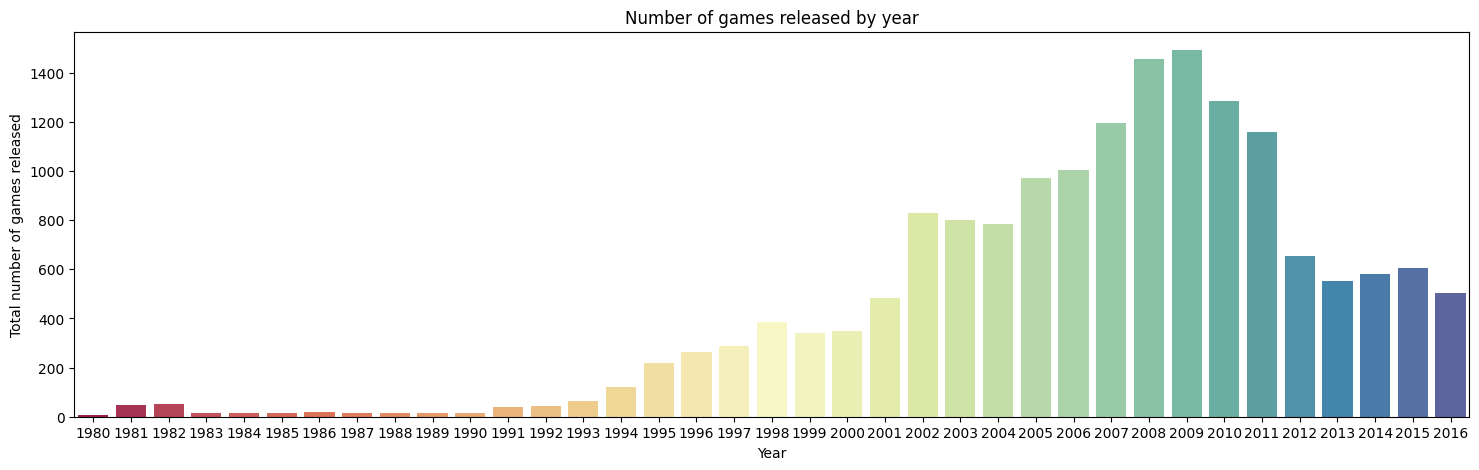

In [65]:
custom_palette = sns.color_palette("Spectral", as_cmap=False, n_colors=len(df['year_of_release'].unique()))


plt.figure(figsize=(18, 5))
sns.countplot( x='year_of_release', data = df, hue='year_of_release', palette=custom_palette, legend=False);
plt.title('Number of games released by year')
plt.ylabel('Total number of games released')
plt.xlabel('Year')

The peak of game releases was in 2009 with a very close second in 2008. After this point game releases decline, but never goes lower than year 2000. Despite the amount of data, in regards to the current goal and project, data for that period and other previous periods is not significant due to the platfroms from that time being outdated, and replaced with newer generations. Because of this, only data from year for current platfroms will be considered within the context of the goal. Data from previous periods can still be used for insight however.

In [66]:
#Creating pivot table from 'df' named 'total_game_sales'.
total_game_sales = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales').reset_index()

#Renaming columns to 'Total Game Sales'.
total_game_sales = total_game_sales.rename(columns={'total_sales': 'Total Game Sales'})

#Printing 'total_game_sales'.
total_game_sales

,platform,Total Game Sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,30.77
9,SAT,33.59


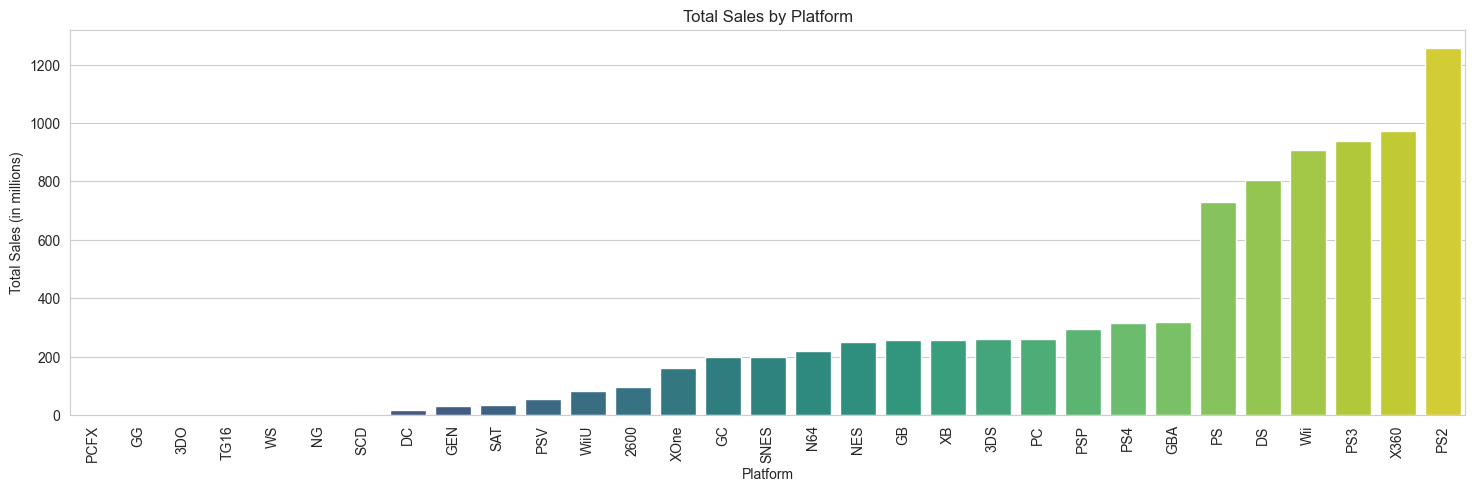

In [68]:
#Setting graph style.
sns.set_style('whitegrid')
plt.figure(figsize=(18, 5))

#Creating the bar plot using Seaborn.
sns.barplot(data=total_game_sales, x='platform', y='Total Game Sales', palette='viridis', hue='platform', legend=False)

#Adding title and labels.
plt.title('Total Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')

#Rotating x-axis labels for better readability.
plt.xticks(rotation=90)


plt.show()

Above we see the chart for Total Sales by Platform, and see 'PS2' in the top position. Falling behing we see the 'XBOX 360' in second followed closely by 'PS3' and the 'Wii'. Below we will see how each platform did on average, and if this matches the success we see in total sales.

In [69]:
#Creating pivot table from 'df' named 'average_game_sales'.
average_game_sales = df.pivot_table(index='platform', values='total_sales', aggfunc='mean').sort_values(by='total_sales').reset_index()

#Renaming columns to 'Average Game Sales'.
average_game_sales = average_game_sales.rename(columns={'total_sales': 'Average Game Sales'})

#Printing 'average_game_sales'.
average_game_sales

,platform,Average Game Sales
0,PCFX,0.030000
1,3DO,0.033333
2,GG,0.040000
3,TG16,0.080000
4,NG,0.120000
5,PSV,0.125744
6,SAT,0.194162
7,WS,0.236667
8,PSP,0.243218
9,PC,0.266448


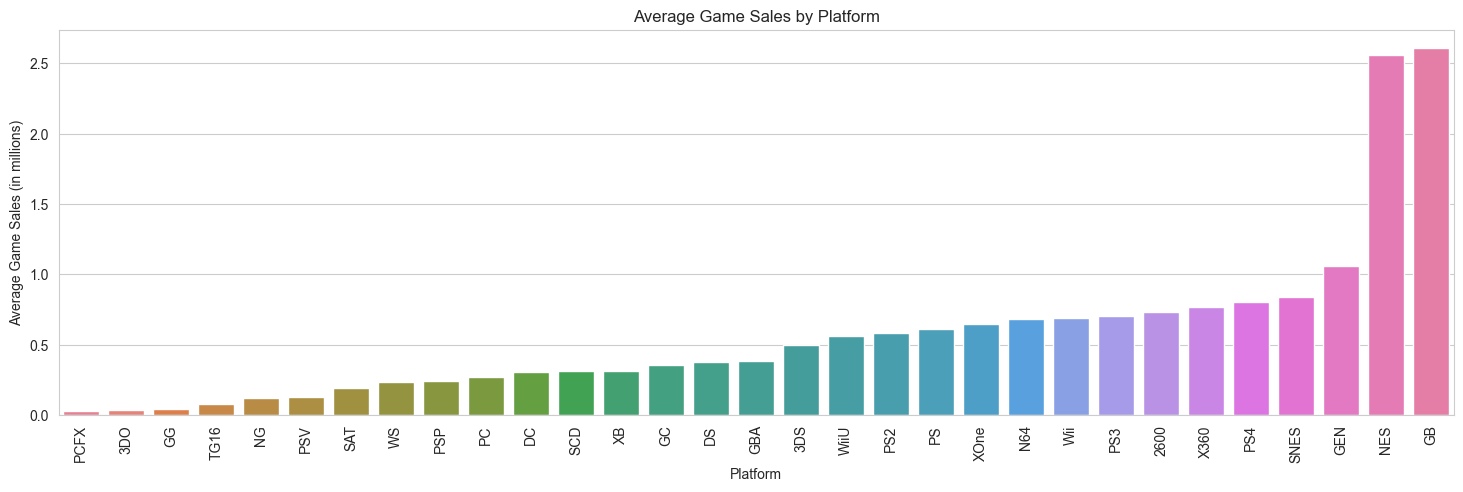

In [70]:
#Setting graph style.
sns.set_style('whitegrid')
plt.figure(figsize=(18, 5))

#Creating the bar plot using Seaborn.
sns.barplot(data=average_game_sales, x='platform', y='Average Game Sales', hue='platform', legend=False)

#Adding title and labels.
plt.title('Average Game Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Game Sales (in millions)')

#Rotating x-axis labels for better readability.
plt.xticks(rotation=90)

#Displaying the plot.
plt.show()

In terms of average game sales by platform, the PS2 and Xbox 360 ranked considerably lower on the chart, while the Game Boy and NES dominated with the highest average game sales, each more than doubling that of the third position held by the Genesis.

This indicates that, although platforms like the PS2 and Xbox 360 achieved the highest total sales, this success was driven more by the sheer volume of available games rather than a high average sales performance per game.

__PlayStation__

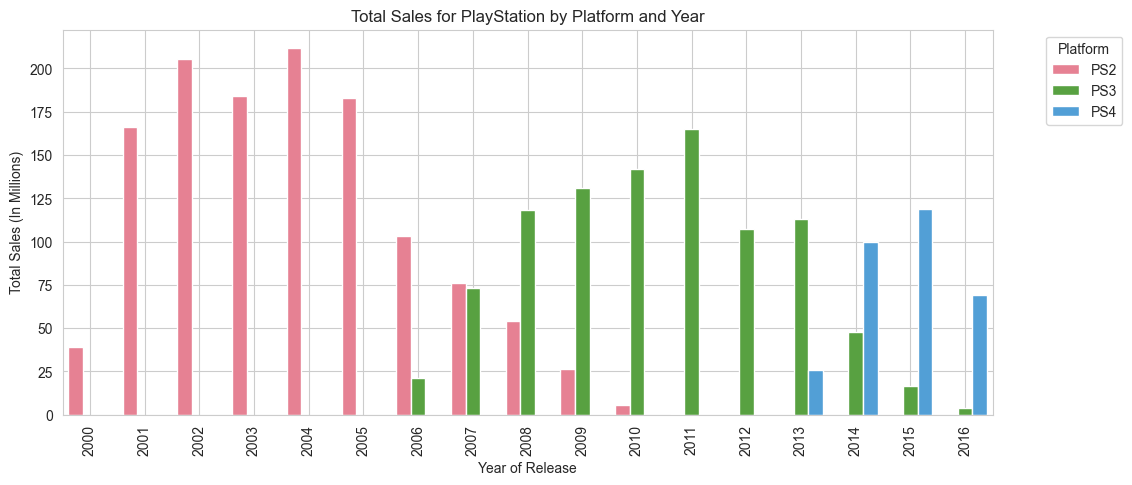

In [71]:
#Assigning to 'df_playstation', all rows from 'df' whose platform is 'PS2' or 'PS3' or 'PS4'.
df_playstation = df[df['platform'].isin(['PS2', 'PS3', 'PS4'])]

#Assigning to 'playstation_platform_year', the total sales sum grouped by platform and year of release.
playstation_platform_year = df_playstation.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

#Plotting 'playstation_platform_year' using Seaborn
plt.figure(figsize=[12, 5])
sns.barplot(data=playstation_platform_year, x='year_of_release', y='total_sales', hue='platform', palette='husl')

#Adding title and labels
plt.title('Total Sales for PlayStation by Platform and Year')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (In Millions)')

#Rotating x-axis labels for better readability
plt.xticks(rotation=90)

#Displaying the plot
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Here we see the distribution of games by 'year_of_release' for PS2, PS3 and PS4, showcasing how one generation transitions into the next. Both outdated platforms have a life span of about 10 years and generally begin to fade away as the peak of the next generation arrives, while the next generation emerges shortly after the peak of the previous generation. Based on these trends, the lifespan of the 'PS3' just finished, marking the coming peak for the 'PS4'.

__XBOX__

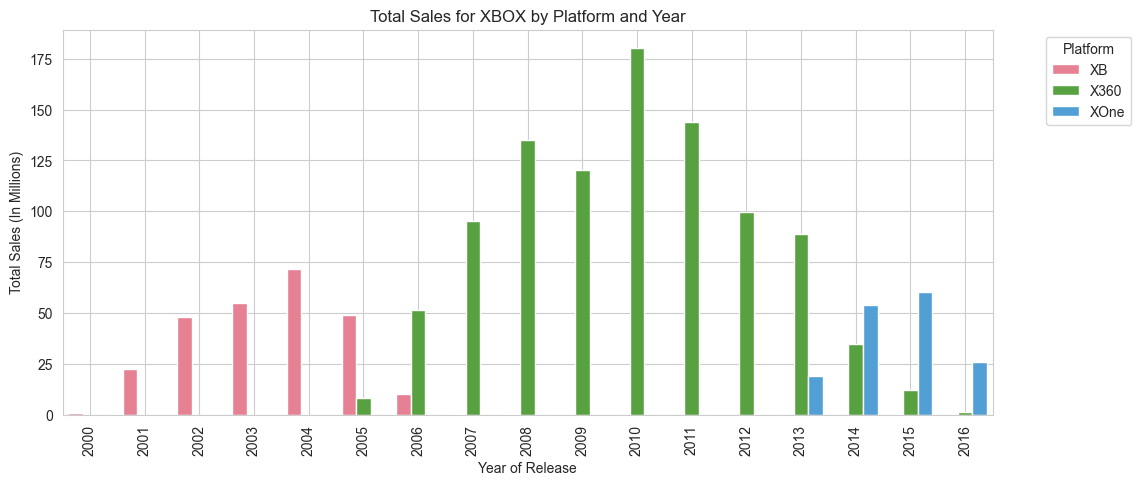

In [72]:
#Assigning to 'df_xbox', all rows from 'df' whose platform is 'XB' or 'X360' or 'XOne'.
df_xbox = df[(df['platform'] == 'XB') | (df['platform'] == 'X360') | (df['platform'] == 'XOne')]

#Assigning to 'xbox_platform_year', the total sales sum grouped by platform and year of release.
xbox_platform_year = df_xbox.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

#Plotting 'playstation_platform_year' using Seaborn.
plt.figure(figsize=[12, 5])
sns.barplot(data=xbox_platform_year, x='year_of_release', y='total_sales', hue='platform', palette='husl')

#Adding title and labels.
plt.title('Total Sales for XBOX by Platform and Year')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (In Millions)')

#Rotating x-axis labels for better readability.
plt.xticks(rotation=90)

#Displaying the plot.
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

2000 was the debut of the XBox, with a lifespan of about 6 years and peaking 4 years in. This smaller peak and lifespan is perhaps due to a lack of a previous generation, but this changes once the XBox360 arrives which has a lifespan of about 11 years and peaking in about 5 years, more similar to the stats for Playstation.

__Nintendo__

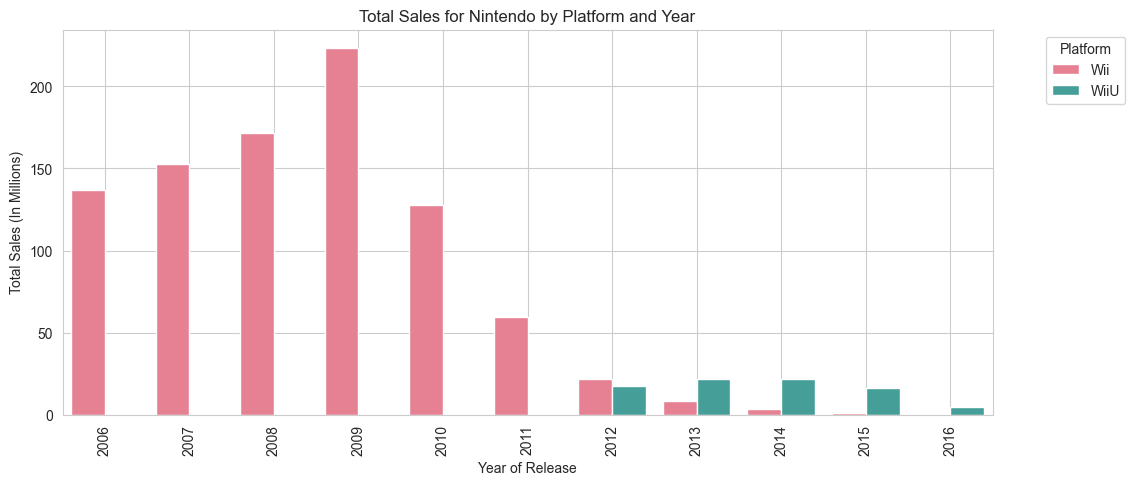

In [73]:
#Assigning to 'df_nin', all rows from 'df' whose platform is 'Wii' or 'WiiU'.
df_nin = df[(df['platform'] == 'Wii') | (df['platform'] == 'WiiU')]

#Assigning to 'nin_platform_year', the total sales sum grouped by platform and year of release.
nin_platform_year = df_nin.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

#Plotting 'playstation_platform_year' using Seaborn.
plt.figure(figsize=[12, 5])
sns.barplot(data=nin_platform_year, x='year_of_release', y='total_sales', hue='platform', palette='husl')

#Adding title and labels.
plt.title('Total Sales for Nintendo by Platform and Year')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (In Millions)')

#Rotating x-axis labels for better readability.
plt.xticks(rotation=90)

#Displaying the plot.
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Nintendo has a different story in it's charts, with the Wii exploding in popularity right from the start with a lifespan of about 9 years and peaking 4 short years. Compared to other systems, the Wii immediatly had traction and sales, however this hype and demand did not follow into the next and current gen platform, the WiiU, which has the least sales of any current (2016) platform.

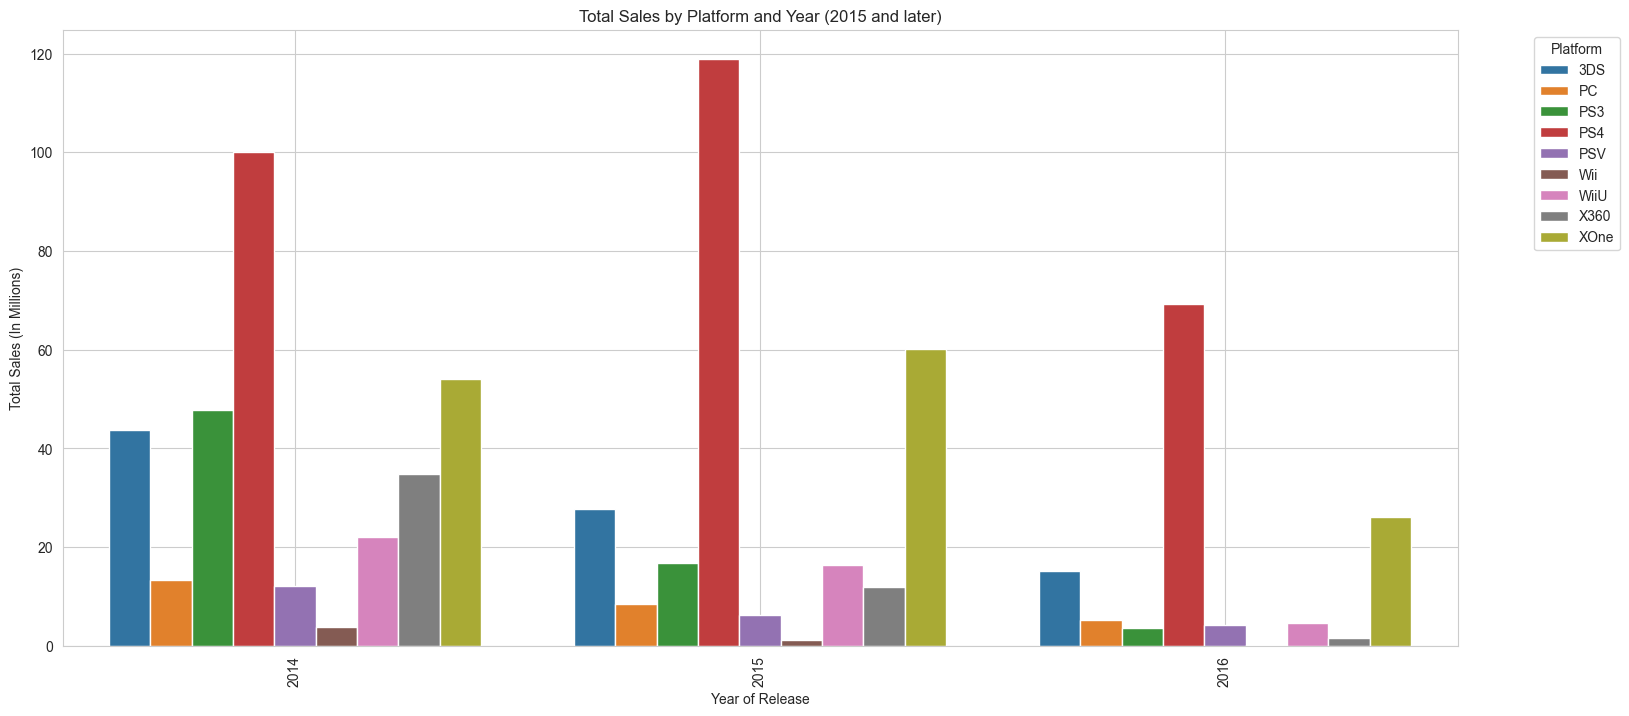

In [74]:
#Assigning to 'modern_df' all rows with a 'year_of_release' equal or greater than 2013.
modern_df = df[(df['year_of_release'] >= 2014)]

#Removing all rows with 'PSP' in 'platfrom'.
modern_df = modern_df[modern_df['platform'] != 'PSP']

#Assigning to 'modern_sales_table' the 'total_sales' sum, grouped by 'platform' and 'year_of_release'.
modern_sales_table = modern_df.groupby(['platform', 'year_of_release'], observed=True)['total_sales'].sum().reset_index()

plt.figure(figsize=[18, 8])
sns.barplot(data=modern_sales_table, x='year_of_release', y='total_sales', hue='platform')

# Adding title and labels
plt.title('Total Sales by Platform and Year (2015 and later)')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (In Millions)')

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Displaying the plot
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Looking at data from 2014-2016, we see the decline of multiple platforms like the PS3, PSVita, Wii, XBox360, 3DS, and even the WiiU, which is a current gen console. Opposite to that, we see XBox One, and PS4 growing in sales and replacing their previous gen consoles, with PS4 likely on it's way to it's peak in the next few years. XBox One and PS4 are currently the most profitable platforms.

Despite the loss of popularity for 'PS4' and 'XOne' in 2016, I suspect this to be due to incomplete data for that year.

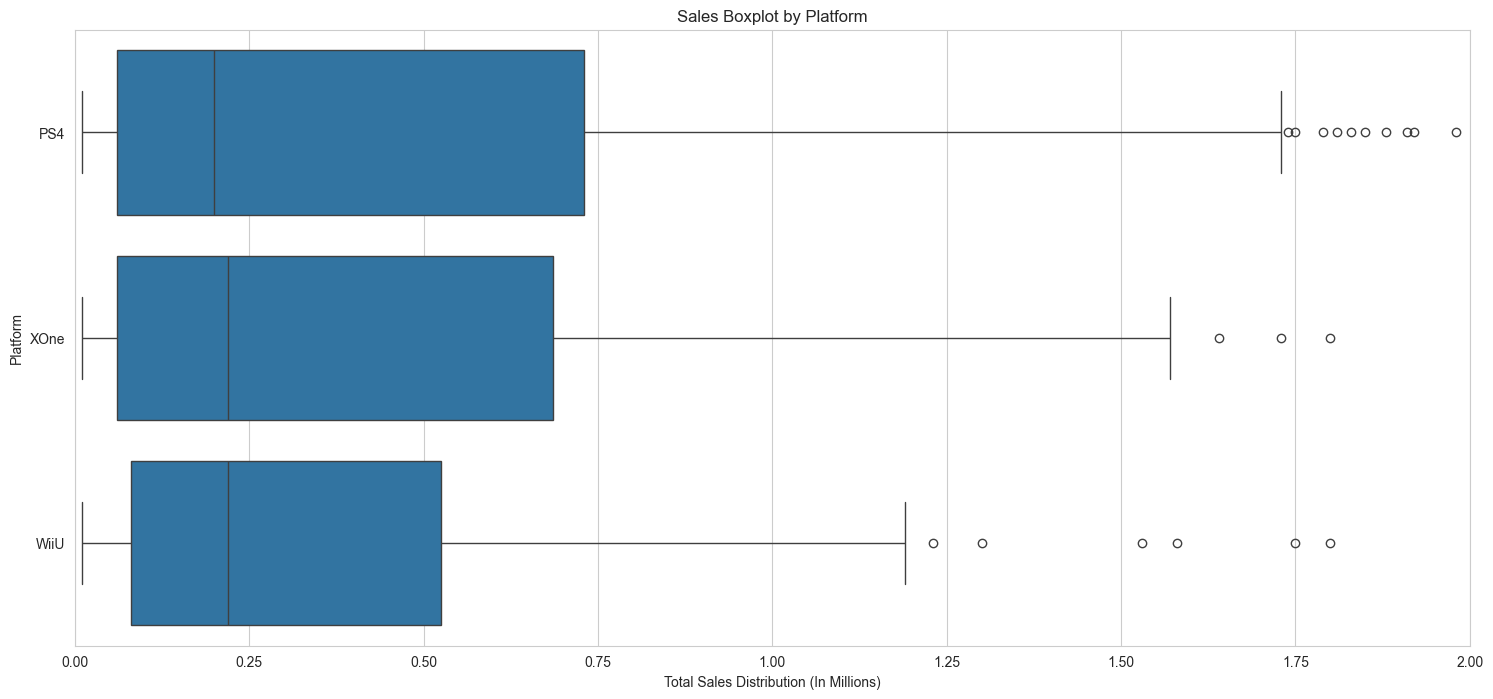

In [77]:
df_filtered = df.dropna(subset=['platform'])
df_filtered = df_filtered[(df_filtered['platform'] == 'PS4') | (df_filtered['platform'] == 'XOne')| (df_filtered['platform'] == 'WiiU')]

# Plotting a boxplot broken down by platform
plt.figure(figsize=(18, 8))
sns.boxplot(data=df_filtered, x='total_sales', y='platform', orient='h')
plt.title('Sales Boxplot by Platform')
plt.xlabel('Total Sales Distribution (In Millions)')
plt.ylabel('Platform')
plt.xlim([0, 2])
plt.show()

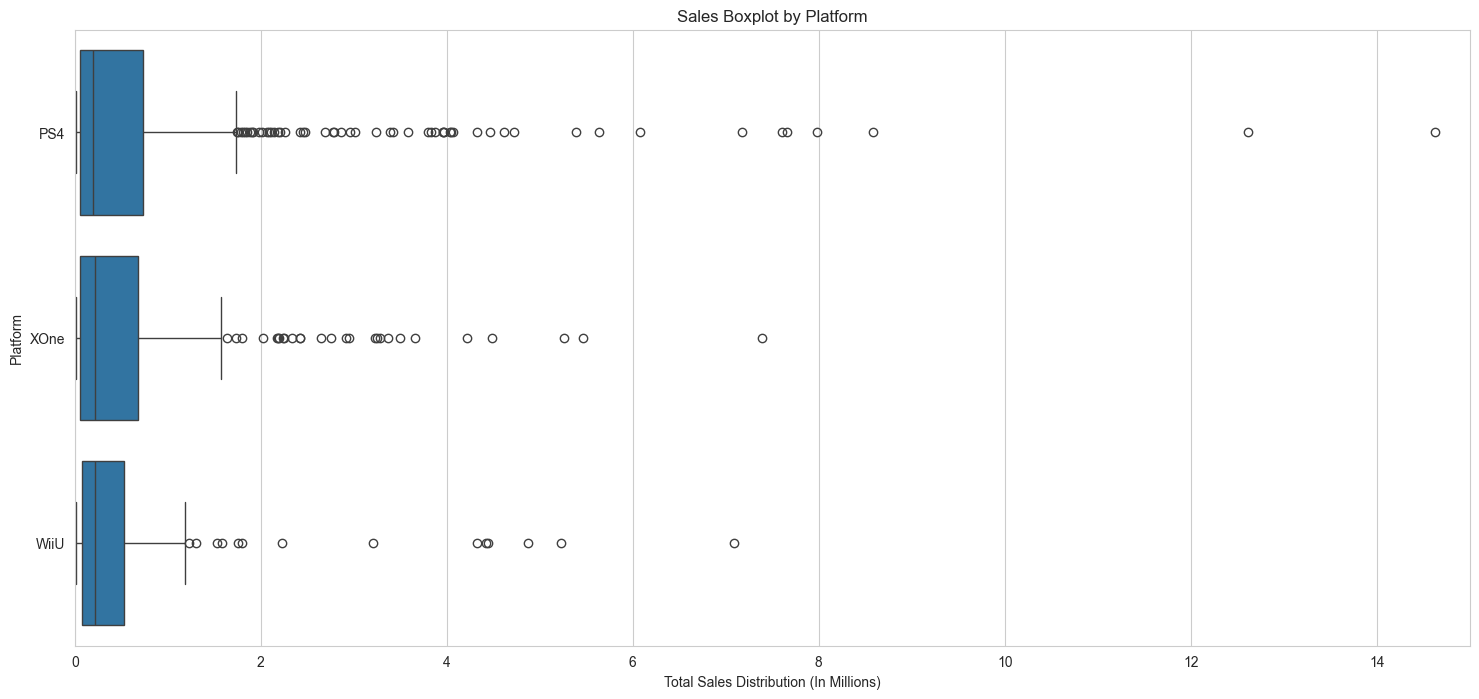

In [76]:
df_filtered = df.dropna(subset=['platform'])
df_filtered = df_filtered[(df_filtered['platform'] == 'PS4') | (df_filtered['platform'] == 'XOne')| (df_filtered['platform'] == 'WiiU')]

# Plotting a boxplot broken down by platform using Seaborn
plt.figure(figsize=(18, 8))
sns.boxplot(data=df_filtered, x='total_sales', y='platform', orient='h')
plt.title('Sales Boxplot by Platform')
plt.xlabel('Total Sales Distribution (In Millions)')
plt.ylabel('Platform')
plt.xlim([0, 15])
plt.show()

When comparing the current generation of platforms, despite having the most sales PS4's median falls behind both XBox One and the WiiU, however is consistent in releasing games that sale around .75 (million). There are also a few outliers much futher up the total sales position going as far as 14 million in total sales, doubling the highest outlier for the XBox One at 7.3 Million in total sales.

Because of having a much higher 3rd quartile than the rest of the platforms, and much higher outliers, the PS4 is the most consistently successful platform of the 3.

In [78]:
#Assigning to 'ps4_df', all rows in 'df' whose platform is 'PS4'.
ps4_df = df[df['platform'] =='PS4']
ps4_df = ps4_df.dropna()

In [79]:
print('Correlation between critic reviews and sales for PS4:')
ps4_df['critic_score'].astype('float64').corr(ps4_df['total_sales'])

Correlation between critic reviews and sales for PS4:


0.4035729107357781

In [81]:
print('Correlation between user reviews and sales for PS4:')
print(ps4_df['user_score'].astype('float64').corr(ps4_df['total_sales']))

Correlation between user reviews and sales for PS4:
-0.03088781296873359


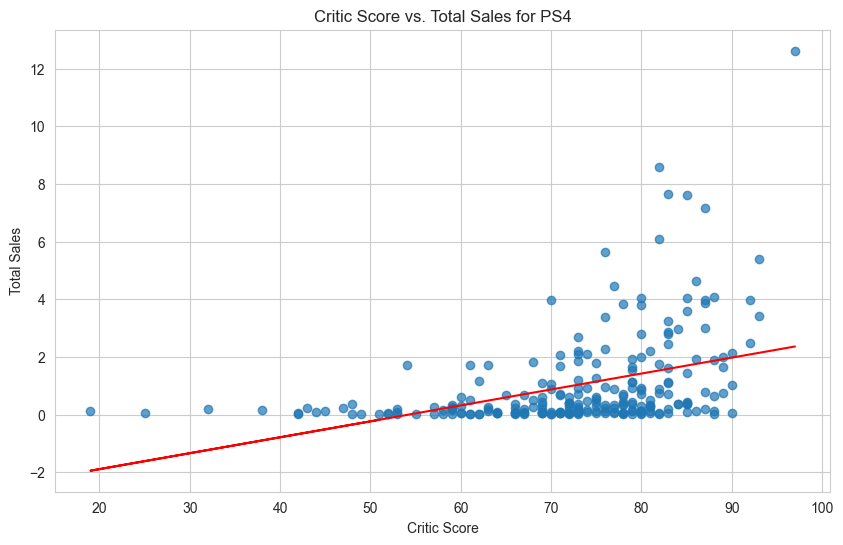

In [82]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(ps4_df['critic_score'], ps4_df['total_sales'], alpha=0.7)
plt.title('Critic Score vs. Total Sales for PS4')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')

# Adding a regression line
m, b = np.polyfit(ps4_df['critic_score'].astype('float64'), ps4_df['total_sales'], 1)
plt.plot(ps4_df['critic_score'], m * ps4_df['critic_score'] + b, color='red')

plt.grid(True)
plt.show()

The correlation between critic scores and total sales for PS4 is moderatly positive. While not guaranteed, higher critic scores lead to higher potetial total sales.

In [83]:
print('Correlation between user reviews and sales for PS4:')
print(ps4_df['user_score'].astype('float64').corr(ps4_df['total_sales']))

Correlation between user reviews and sales for PS4:
-0.03088781296873359


User scores have a different relationship with Total Sales for PS4. Although negative, the correlation between user scores and total sales is practically non existent.

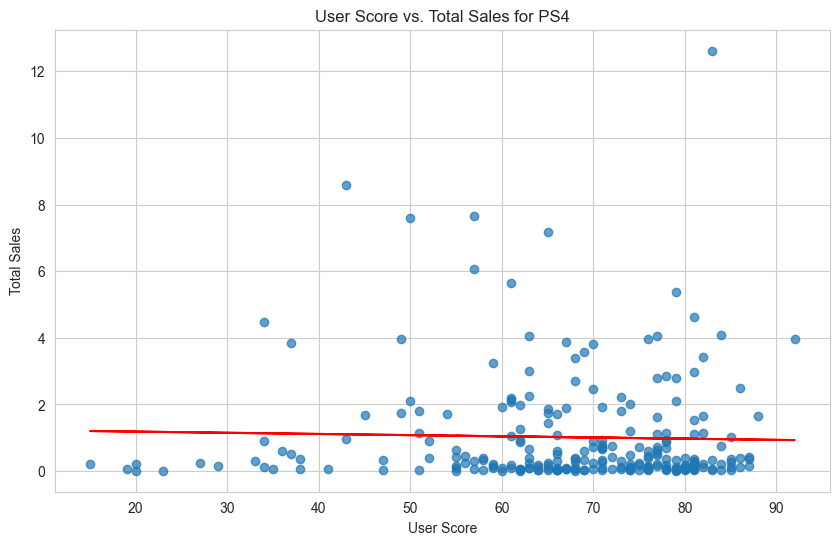

In [84]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(ps4_df['user_score'], ps4_df['total_sales'], alpha=0.7)
plt.title('User Score vs. Total Sales for PS4')
plt.xlabel('User Score')
plt.ylabel('Total Sales')

# Adding a regression line
m, b = np.polyfit(ps4_df['user_score'].astype('float64'), ps4_df['total_sales'], 1)
plt.plot(ps4_df['user_score'], m * ps4_df['user_score'] + b, color='red')

plt.grid(True)
plt.show()

In [86]:
xone_df = df[df['platform'] =='XOne']
xone_df = xone_df.dropna()

In [87]:
print('Correlation between critic reviews and sales for XBOX ONE:')
print(xone_df['critic_score'].astype('float64').corr(xone_df['total_sales']))

Correlation between critic reviews and sales for XBOX ONE:
0.409929586886011


In [88]:
print('Correlation between user reviews and sales for XBOX ONE:')
print(xone_df['user_score'].astype('float64').corr(xone_df['total_sales']))

Correlation between user reviews and sales for XBOX ONE:
-0.07591595053938054


User scores have a different relationship with Total Sales for XBOX ONE. Although negative, the correlation between user scores and total sales is practically non existent.

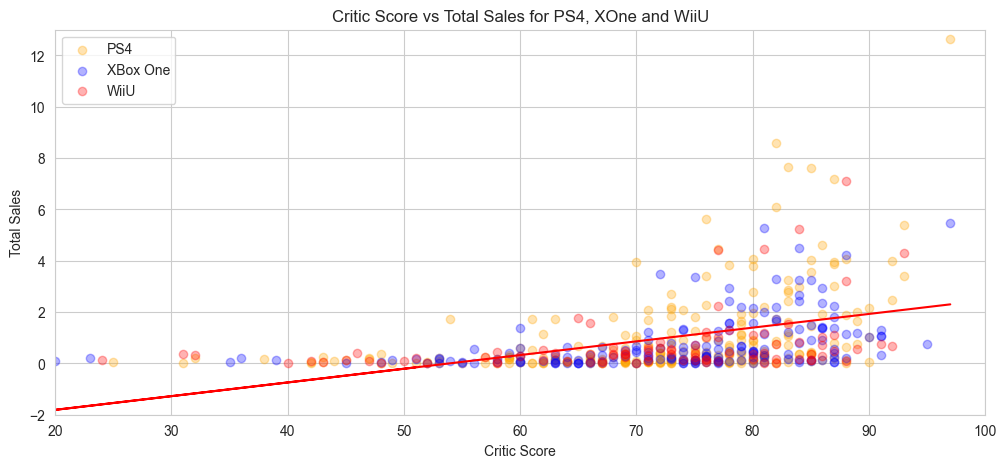

In [91]:
#Assigning to 'ps4_df', all rows in 'df' whose platform is 'PS4'.
# Filter data for PS4 and X360 platforms
ps4_df = df[(df['platform'] == 'PS4') & df['critic_score'].notna() & df['total_sales'].notna()]
xone_df = df[(df['platform'] == 'XOne') & df['critic_score'].notna() & df['total_sales'].notna()]
nin_df = df[(df['platform'] == 'WiiU') & df['critic_score'].notna() & df['total_sales'].notna()]
# Plotting both platforms on the same scatter plot
plt.figure(figsize=[12,5])
plt.scatter(ps4_df['critic_score'], ps4_df['total_sales'], alpha=0.3, color='orange', label='PS4')
plt.scatter(xone_df['critic_score'], xone_df['total_sales'], alpha=0.3, color='blue', label='XBox One')
plt.scatter(nin_df['critic_score'], nin_df['total_sales'], alpha=0.3, color='red', label='WiiU')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.title('Critic Score vs Total Sales for PS4, XOne and WiiU')
plt.legend()
plt.ylim([-2, 13])
plt.xlim([20, 100])

# Adding a regression line
m, b = np.polyfit(ps4_df['critic_score'].astype('float64'), ps4_df['total_sales'], 1)
plt.plot(ps4_df['critic_score'], m * ps4_df['critic_score'] + b, color='red')

plt.show()

There is a moderately positive correlation between critic scores and total sales. This implies that as critic scores increase, total sales tend to increase as well, indicating that critical acclaim can significantly influence the commercial success of a game.

While it's important to acknowledge that this correlation may not hold true for every case, a good critic review has the potential to be the catalyst for the widespread success of a game. In some instances, a particularly favorable review can propel a game into the spotlight.

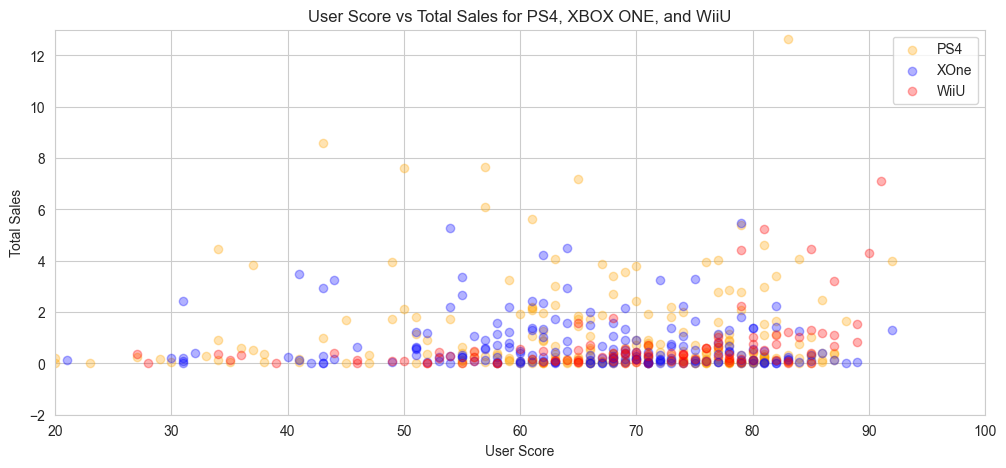

In [92]:
ps4_df = df[(df['platform'] == 'PS4') & df['user_score'].notna() & df['total_sales'].notna()]
xone_df = df[(df['platform'] == 'XOne') & df['user_score'].notna() & df['total_sales'].notna()]
nin_df = df[(df['platform'] == 'WiiU') & df['user_score'].notna() & df['total_sales'].notna()]
# Plotting both platforms on the same scatter plot
plt.figure(figsize=[12,5])
plt.scatter(ps4_df['user_score'], ps4_df['total_sales'], alpha=0.3, color='orange', label='PS4')
plt.scatter(xone_df['user_score'], xone_df['total_sales'], alpha=0.3, color='blue', label='XOne')
plt.scatter(nin_df['user_score'], nin_df['total_sales'], alpha=0.3, color='red', label='WiiU')
plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.title('User Score vs Total Sales for PS4, XBOX ONE, and WiiU')
plt.legend()
plt.ylim([-2, 13])  # Set y-axis limits
plt.xlim([20, 100])  # Set y-axis limits
plt.show()

The relationship between User Scores and Total Sales is very weak. User scores often reflect the opinions and preferences of the gaming community. While they provide valuable insights into user satisfaction and enjoyment, they may not necessarily translate directly into the commercial success or critical acclaim of a game.

It's important to recognize that while there may be many games highly regarded and scored by fans, their impact on the overall success of a game is often limited, particularly when compared to critic scores.

Overall, while user scores provide valuable insights into the preferences of the gaming community, critic scores often carry more weight in determining a game's commercial success. 

In [94]:
#Printing rows where 'name' is 'Call of Duty: Infinite Warfare'.
cod_df = df[df['name'] == 'Call of Duty: Infinite Warfare']
cod_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,generation
245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77,34,M,4.47,New Gen
640,Call of Duty: Infinite Warfare,XOne,2016,Shooter,1.46,0.74,0.00,0.22,78,31,M,2.42,New Gen
9292,Call of Duty: Infinite Warfare,PC,2016,Shooter,0.04,0.08,0.00,0.01,73,30,M,0.13,New Gen


C:\Users\crisl\AppData\Local\Temp\ipykernel_19832\3967246078.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cod_df, x='platform', y='total_sales', palette='viridis')


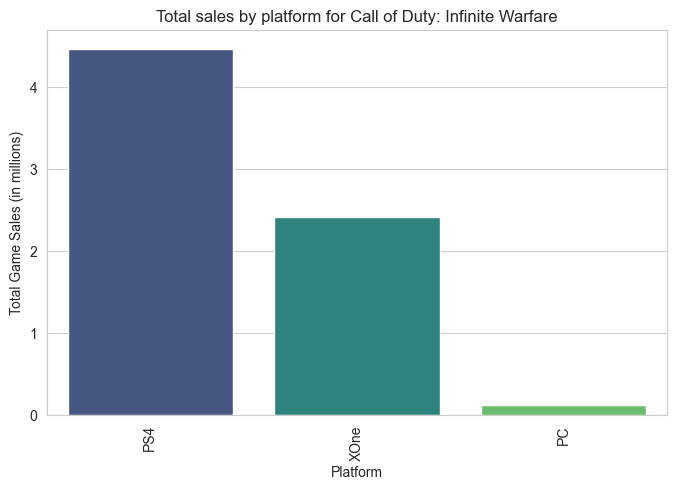

In [95]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 5))

# Creating the bar plot
sns.barplot(data=cod_df, x='platform', y='total_sales', palette='viridis')

# Adding title and labels
plt.title('Total sales by platform for Call of Duty: Infinite Warfare')
plt.xlabel('Platform')
plt.ylabel('Total Game Sales (in millions)')

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Displaying the plot
plt.show()

In [97]:
#Printing rows where 'name' is 'Grand Theft Auto V'.
gta_df = df[df['name'] == 'Grand Theft Auto V']
gta_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,generation
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,82,M,21.05,Modern Gen
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,81,M,16.27,Modern Gen
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,83,M,12.62,Modern Gen
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,79,M,5.47,Modern Gen
1730,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.00,0.09,96,79,M,1.17,New Gen


C:\Users\crisl\AppData\Local\Temp\ipykernel_19832\586792025.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gta_df, x='platform', y='total_sales', palette='viridis')


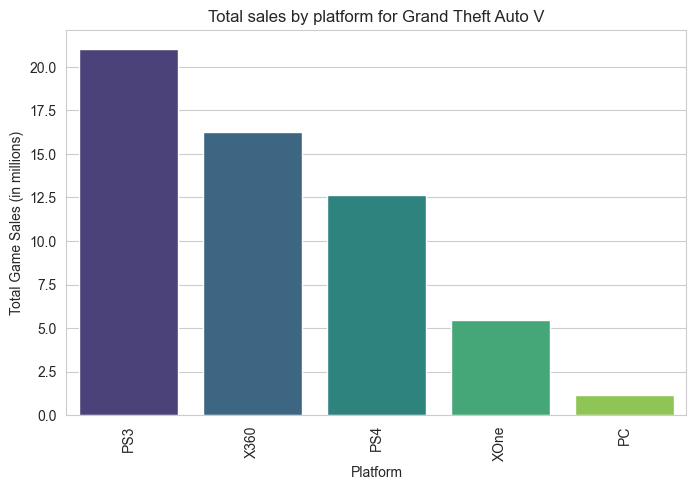

In [98]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 5))

# Creating the bar plot
sns.barplot(data=gta_df, x='platform', y='total_sales', palette='viridis')

# Adding title and labels
plt.title('Total sales by platform for Grand Theft Auto V')
plt.xlabel('Platform')
plt.ylabel('Total Game Sales (in millions)')

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Displaying the plot
plt.show()

In [99]:
#Printing rows where 'name' is 'Call of Duty: Black Ops 3'.
cod_df = df[df['name'] == 'Call of Duty: Black Ops 3']
cod_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,generation
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,<NA>,NaN,14.63,New Gen
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,<NA>,<NA>,NaN,7.39,New Gen
1049,Call of Duty: Black Ops 3,X360,2015,Shooter,1.14,0.40,0.00,0.16,<NA>,<NA>,NaN,1.70,New Gen
1062,Call of Duty: Black Ops 3,PS3,2015,Shooter,0.49,0.87,0.07,0.26,<NA>,<NA>,NaN,1.69,New Gen
6463,Call of Duty: Black Ops 3,PC,2015,Shooter,0.00,0.25,0.00,0.01,<NA>,<NA>,NaN,0.26,New Gen


C:\Users\crisl\AppData\Local\Temp\ipykernel_19832\1687456004.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cod_df, x='platform', y='total_sales', palette='viridis')


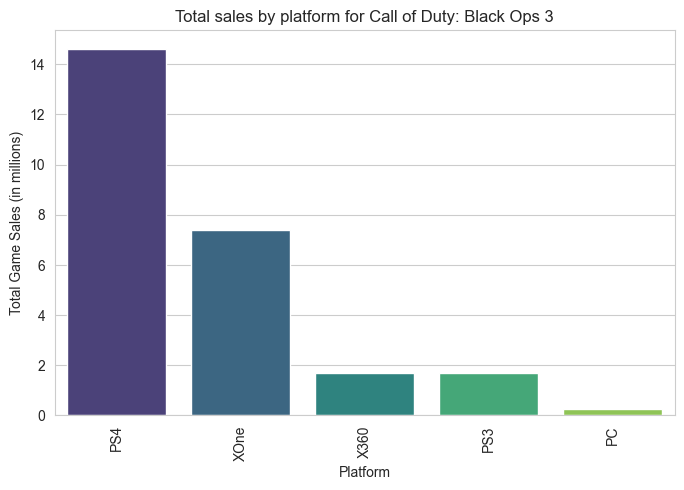

In [100]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 5))


# Creating the bar plot using Seaborn
sns.barplot(data=cod_df, x='platform', y='total_sales', palette='viridis')

# Adding title and labels
plt.title('Total sales by platform for Call of Duty: Black Ops 3')
plt.xlabel('Platform')
plt.ylabel('Total Game Sales (in millions)')

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Displaying the plot
plt.show()

When comparing games across multiple platforms, older games tend to sell better for old platforms but still manage to generate sales for the next generation console. On the other hand, newer games generate more sales for new platforms. PS4 tends to have the most sales when it comes to new games and the current gen, followed by XOne, then PC. In cases where games were released for older platforms, PS3 tends to lead followed by X360.

In [101]:
#Assigning to 'mean_genre_sales' the mean of the 'total_sales' grouped by 'genre'.
mean_genre_sales = df.groupby('genre')['total_sales'].mean().sort_values(ascending=False).reset_index()

mean_genre_sales = mean_genre_sales.rename(columns={'total_sales': 'Average Game Sales (By millions)'})
mean_genre_sales

,genre,Average Game Sales (By millions)
0,Platform,0.932173
1,Shooter,0.795503
2,Role-Playing,0.623872
3,Racing,0.583403
4,Sports,0.566980
5,Fighting,0.527126
6,Action,0.517711
7,Misc,0.458577
8,Simulation,0.446701
9,Puzzle,0.418224


The Platform Genre has historically been the most successful platform, with an average of .93 million in sales per title. Shooters come in a close 2nd with an average of .79 million. Role-Playing games fill the 3rd position at an average of .63 million.

In [102]:
#Assigning to 'mean_genre_sales' the mean of the 'total_sales' grouped by 'genre'.
mean_genre_sales_2016 = df[df['year_of_release'] == 2016].groupby('genre')['total_sales'].mean().sort_values(ascending=False).reset_index()

mean_genre_sales_2016 = mean_genre_sales_2016.rename(columns={'total_sales': 'Average Game Sales for 2016 (By millions)'})
mean_genre_sales_2016

,genre,Average Game Sales for 2016 (By millions)
0,Shooter,0.813191
1,Sports,0.489375
2,Role-Playing,0.336667
3,Fighting,0.279375
4,Platform,0.215333
5,Action,0.169157
6,Racing,0.116250
7,Simulation,0.105000
8,Strategy,0.086923
9,Misc,0.081250


When looking at the 2016 year, Shooters are by far the most successful on average, typically selling .81 million per title. Sports comes in at a far 2nd, at .49 million. Role-Playing games retain the 3rd position with an average of .33 in sales.

C:\Users\crisl\AppData\Local\Temp\ipykernel_19832\2005752426.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_genre_sales_2016, x='genre', y='Average Game Sales for 2016 (By millions)', palette='viridis')


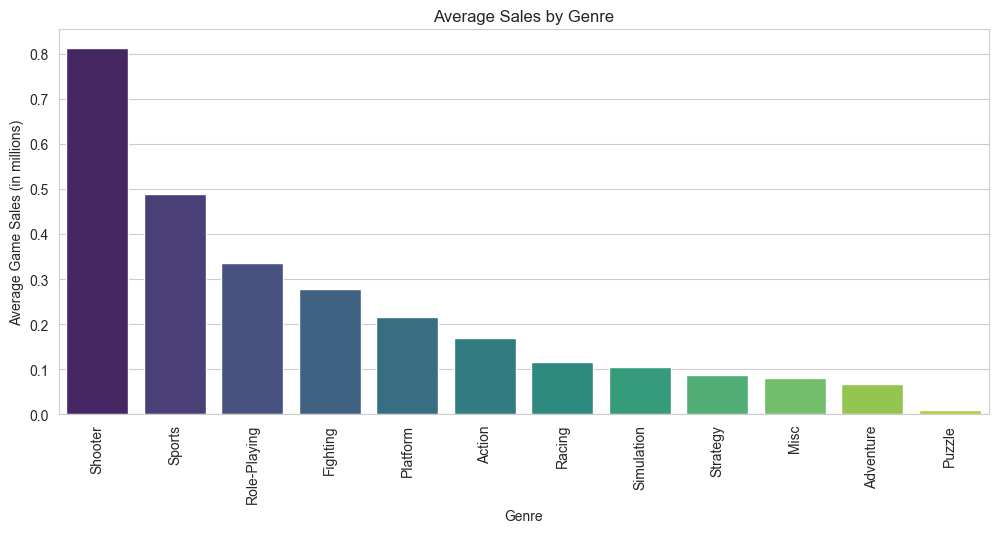

In [103]:
#Plotting mean Sales by Genre as bargraph.
sns.set_style('whitegrid')
plt.figure(figsize=(12, 5))

#Creating the bar plot using Seaborn.
sns.barplot(data=mean_genre_sales_2016, x='genre', y='Average Game Sales for 2016 (By millions)', palette='viridis')

#Adding title and labels.
plt.title('Average Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Game Sales (in millions)')

#Rotating x-axis labels for better readability.
plt.xticks(rotation=90)

#Displaying the plot.
plt.show()

Here we see how far above the rest the Shooter Genre stands in terms of Average sales in 2016. Sports and Role-Playing games also hold a significant market share. 

In [104]:
#Calculating median 'total sales' for each genre.
median_genre_sales = df[df['year_of_release'] == 2016].groupby('genre')['total_sales'].median().sort_values(ascending=False).reset_index(name='Median Game Sales (By millions)')
mean_genre_sales = df[df['year_of_release'] == 2016].groupby('genre')['total_sales'].mean().sort_values(ascending=False).reset_index(name='Average Game Sales (By millions)')
genre_chart = median_genre_sales.merge(mean_genre_sales, on='genre')
total_genre_sales = df[df['year_of_release'] == 2016].groupby('genre')['total_sales'].sum().sort_values(ascending=False).reset_index(name='Total Game Sales (By millions)')
genre_chart = genre_chart.merge(total_genre_sales, on='genre')

genre_chart

,genre,Median Game Sales (By millions),Average Game Sales (By millions),Total Game Sales (By millions)
0,Shooter,0.240,0.813191,38.22
1,Role-Playing,0.120,0.336667,18.18
2,Sports,0.120,0.489375,23.49
3,Platform,0.100,0.215333,3.23
4,Fighting,0.085,0.279375,4.47
5,Strategy,0.060,0.086923,1.13
6,Action,0.050,0.169157,30.11
7,Racing,0.050,0.116250,2.79
8,Misc,0.040,0.081250,2.60
9,Simulation,0.025,0.105000,1.89


C:\Users\crisl\AppData\Local\Temp\ipykernel_19832\3736110679.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['year_of_release'] == 2016], x='genre', y='total_sales', palette='viridis', order=median_genre_sales['genre'])


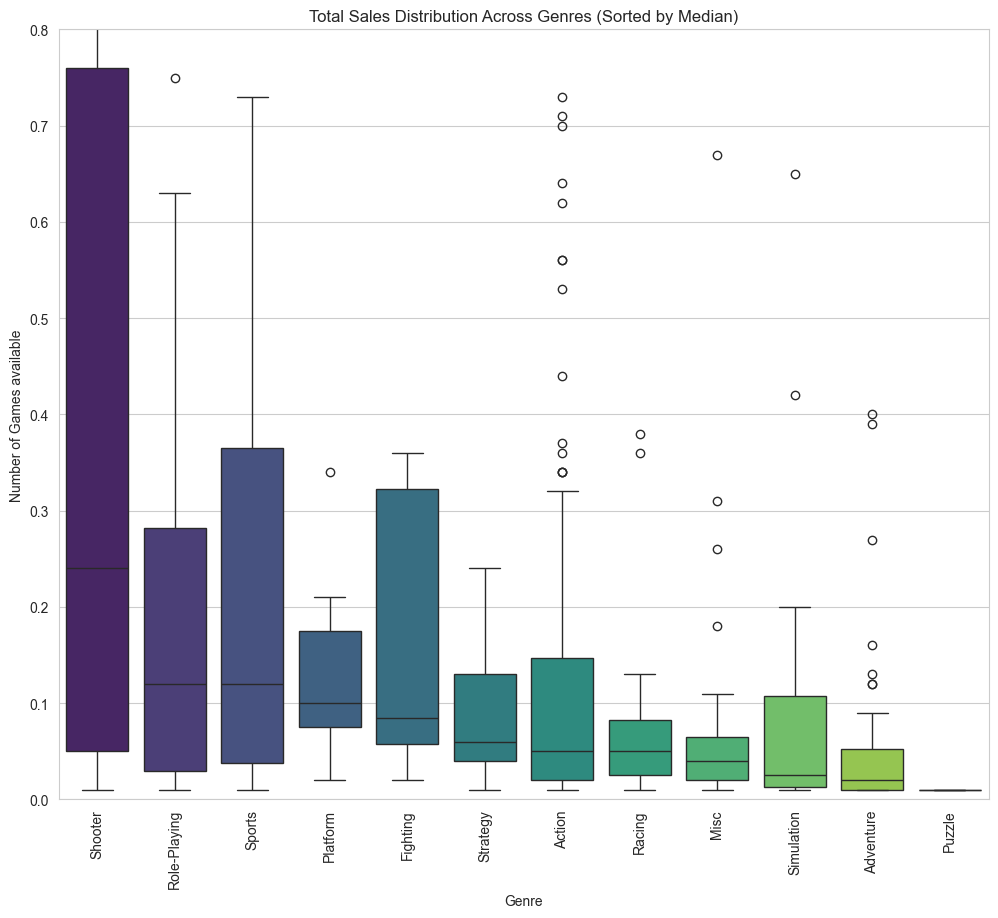

In [105]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 10))

#Creating box plot
sns.boxplot(data=df[df['year_of_release'] == 2016], x='genre', y='total_sales', palette='viridis', order=median_genre_sales['genre'])

#Adding title and labels
plt.title('Total Sales Distribution Across Genres (Sorted by Median)')
plt.xlabel('Genre')
plt.ylabel('Number of Games available')
plt.ylim([0, .8])

#Rotating x-axis labels for better readability
plt.xticks(rotation=90)

#Displaying the plot
plt.show()

In the year 2016, the shooter Genre stands out as the most successful genre, scoring at the top of every metric. The Shooter Genre stands at 38.22 million in Total Sales, averaging at 0.81 million per title. Both the median and the 3rd quartile are far above the competition as well.

The Sports Genre also holds success, coming in 2nd for average game sales, and sharing 2nd for sale median with the Role-Playing Genre. Sports also holds the 2nd highest third quartile indicating consistency in successful titles.

The most profitable genre is by far the Shooter Genre.

## Region Profiles

### US Profile

In [106]:
#Plotting graph for top 5 NA platforms in Total sales overall.
top5_total_sales = df[df['year_of_release'] == 2016].groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index(name='Total Sales in NA (in Millions)').head(5)
top5_average_sales = df[df['year_of_release'] == 2016].groupby('platform')['na_sales'].mean().sort_values(ascending=False).reset_index(name='Average Sales in NA (in Millions)').head(5)
na_chart = top5_total_sales.merge(top5_average_sales, on='platform')

na_chart

,platform,Total Sales in NA (in Millions),Average Sales in NA (in Millions)
0,PS4,21.49,0.131037
1,XOne,14.27,0.164023
2,3DS,4.14,0.090000
3,WiiU,2.10,0.150000


C:\Users\crisl\AppData\Local\Temp\ipykernel_19832\3160078059.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_total_sales, x='platform', y='Total Sales in NA (in Millions)', palette='viridis')


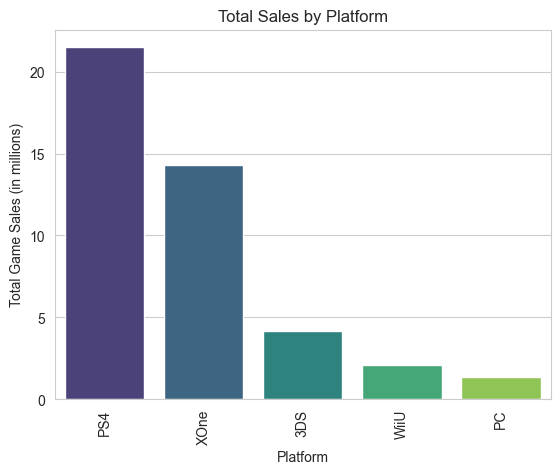

In [107]:
sns.barplot(data=top5_total_sales, x='platform', y='Total Sales in NA (in Millions)', palette='viridis')
#Adding title and labels.
plt.title('Total Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Game Sales (in millions)')

#Rotating x-axis labels for better readability.
plt.xticks(rotation=90)

#Displaying the plot.
plt.show()

PS4 platform emerges as the clear leader in total sales, with sales totaling approximately 21.49 million units in North America. Following behind the PS4, XOne platform secures the second position in total sales, with sales amounting to approximately 14.27 million units in North America. While slightly trailing the PS4, the XOne maintains a significant market share.

From the data, it's evident that while PS4 leads in total sales, Xbox One (XOne) has a higher average sales figure, indicating a more consistent performance per game in terms of sales. Additionally, Xbox One's total sales are notably substantial, demonstrating its significant market presence despite slightly lower total sales compared to PS4.

In [109]:
df_filtered = df_filtered[(df_filtered['platform'] == 'PS4') | (df_filtered['platform'] == 'XOne')| (df_filtered['platform'] == 'WiiU')]

C:\Users\crisl\AppData\Local\Temp\ipykernel_19832\1768473697.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='platform', y='na_sales', palette='viridis')


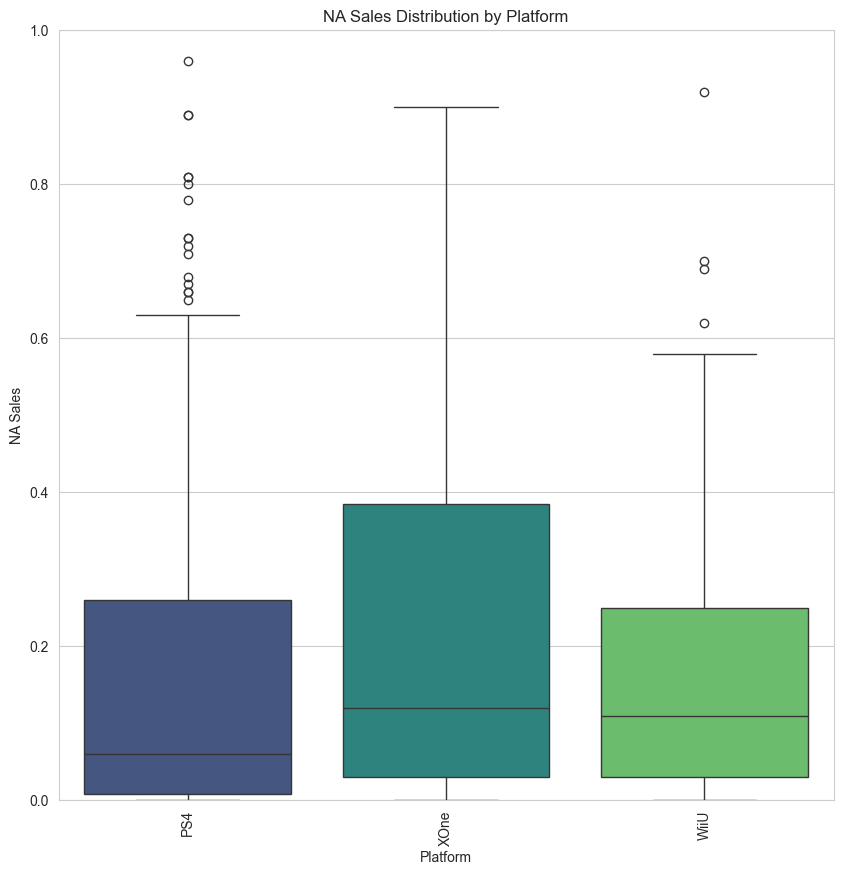

In [110]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 10))
#Creating box plot using Seaborn.
sns.boxplot(data=df_filtered, x='platform', y='na_sales', palette='viridis')
#Adding title and labels.
plt.title('NA Sales Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('NA Sales')
plt.ylim([0, 1])
#Rotating x-axis labels for better readability.
plt.xticks(rotation=90)
#Displaying the plot.
plt.show()

Xbox One stands out as the most consistently successful platform among the three modern consoles. With the highest third quartile and median sales figures, Xbox One exhibits a greater average success rate compared to both PS4 and Wii U. PS4's third quartile was much lower despite sitting at 2nd place, however it's median sales figures were the lowest of the 3 systems, getting it's success from the many outliers PS4 has. While WiiU is behind both other consoles in terms of third quartile, it's very close to that of the PS4, while it's median is more similar to that of the XOne. Despite this total sales for the WiiU are minimal, displaying it's general lack of commercial success.

In [111]:
avg_genre_na = df_filtered.groupby('genre')['na_sales'].mean().sort_values(ascending=False).reset_index(name='Average NA Sales (in Millions)')
total_genre_na = df_filtered.groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index(name='Total NA Sales (in Millions)')
na_genre_chart = avg_genre_na.merge(total_genre_na, on='genre')
na_genre_count = df_filtered.groupby('genre')['na_sales'].count().sort_values(ascending=False).reset_index(name='Number of games available')
na_genre_chart = na_genre_chart.merge(na_genre_count, on='genre')
na_genre_chart

,genre,Average NA Sales (in Millions),Total NA Sales (in Millions),Number of games available
0,Shooter,0.807416,71.86,89
1,Sports,0.400761,36.87,92
2,Platform,0.379412,12.90,34
3,Fighting,0.284333,8.53,30
4,Racing,0.248571,10.44,42
5,Role-Playing,0.229861,16.55,72
6,Misc,0.219836,13.41,61
7,Action,0.218055,63.89,293
8,Puzzle,0.124000,0.62,5
9,Strategy,0.077500,0.93,12


C:\Users\crisl\AppData\Local\Temp\ipykernel_19832\2330162849.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='genre', y='na_sales', palette='viridis')


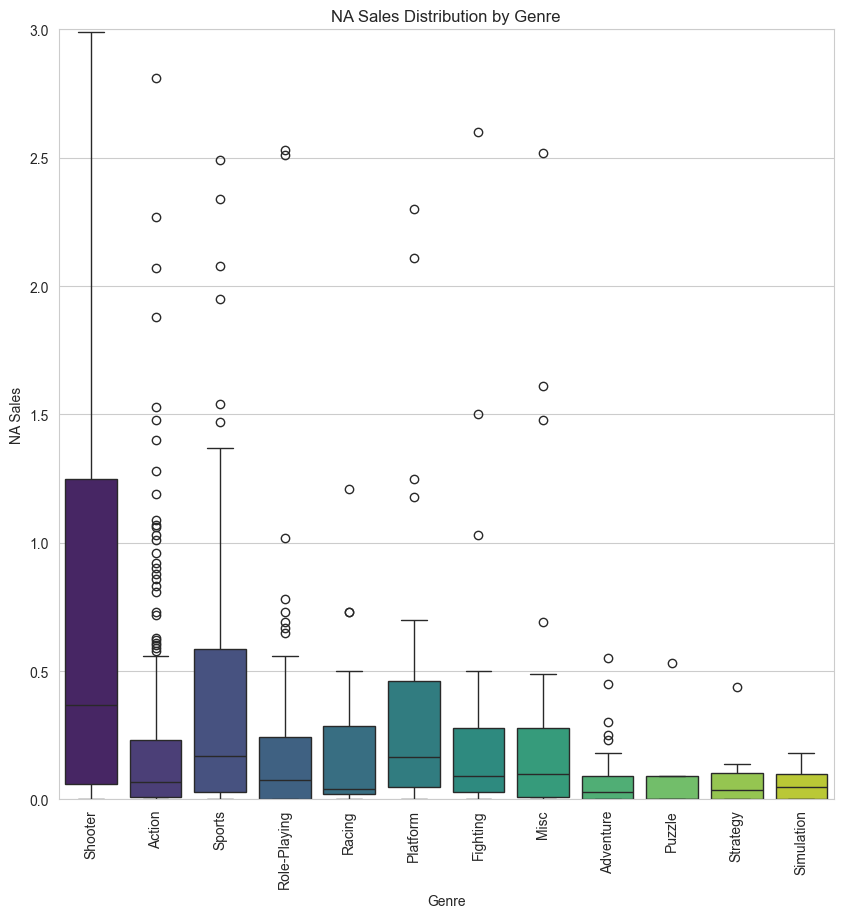

In [112]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 10))
#Creating box plot using Seaborn.
sns.boxplot(data=df_filtered, x='genre', y='na_sales', palette='viridis')
#Adding title and labels.
plt.title('NA Sales Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('NA Sales')
plt.ylim([0, 3])
#Rotating x-axis labels for better readability.
plt.xticks(rotation=90)
#Displaying the plot.
plt.show()

The Shooter genre is the most popular in the NA region. In almost every metric, the shooter genre is more consistently successful, with an average sales of 0.807, a third quartile above 1 million, and the highest median of any genre.

The Sports genre follows behind with a high average and total sales. With the second highest third quartile and average sales, the Sports genre is also consistently successful in the NA Region.

The Platform genre also does well on a per game basis, as it does not have the title count to match the total sales of other genres. However, platformers are 3rd in average sales at .37 million making them moderately and consistently successful in the NA region.

In [114]:
rating_chart = df[df['year_of_release'] == 2016].groupby('rating')['na_sales'].mean().sort_values(ascending=False).reset_index(name='Average Game Sales')
rating_chart

,rating,Average Game Sales
0,M,0.200897
1,E,0.120758
2,T,0.104070
3,E10+,0.076200


C:\Users\crisl\AppData\Local\Temp\ipykernel_19832\4216995501.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rating_chart, x='rating', y='Average Game Sales', palette='viridis')


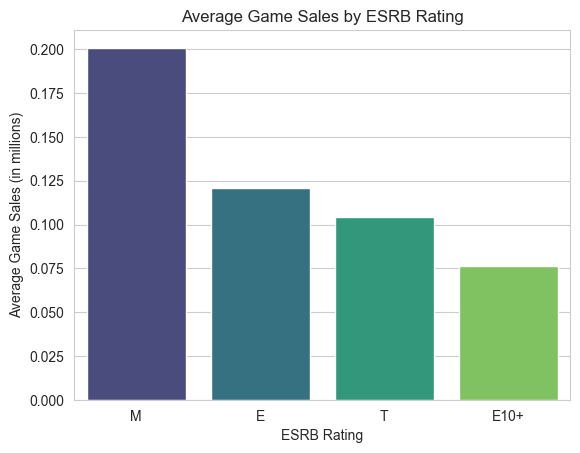

In [120]:
sns.barplot(data=rating_chart, x='rating', y='Average Game Sales', palette='viridis')
#Adding title and labels.
plt.title('Average Game Sales by ESRB Rating')
plt.xlabel('ESRB Rating')
plt.ylabel('Average Game Sales (in millions)')

#Displaying the plot.
plt.show()

The ESRB rating with the highest average game sales is the M (Mature) rating at .2 Million on average. It sales close to twice as much as the second highest rating of E(Everyone) which sits at .12 Million average game sales.

__Conclusion__

In the U.S., as shown in the charts above, PS4 is the leading console in total sales for 2016 followed by the Xbox One, however, games released for the Xbox One tend to have more sales on average than the PS4, by a small but notable margin. WiiU titles also do well on average, doing better than PS4 in average game sales. 

In terms of Genres, the Shooter genre has been the most popular in 2016, leading in both total sales and average sales, by a considerable margin. The Sports genre is also popular, with 3nd most total sales and 2rd most average sales. While the Action genre is 3rd in total sales, on average it doesn't do well enough to be part of the top 5.

For ratings in 2016, more mature games tend to have more sales, with 'M' leading with almost double the sales than the 2nd place 'T' rating. E10+ titles have the least sales in 2016 for the U.S.

### Europe Profile

### Japan Profile

## Testing Statistical Hypothesis

## Conclusion